In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Untitled spreadsheet - Regrerssion_energy_production_data.csv to Untitled spreadsheet - Regrerssion_energy_production_data.csv


In [ ]:
df=pd.read_csv('Untitled spreadsheet - Regrerssion_energy_production_data.csv')
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.shape

(9568, 5)

In [ ]:
df.duplicated().sum()

41

In [ ]:
df[df.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [ ]:
df_cleaned=df.drop_duplicates().reset_index(drop=True)
df_cleaned.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [ ]:
df_cleaned.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


In [ ]:
df_cleaned.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

**VISUALIZATION**

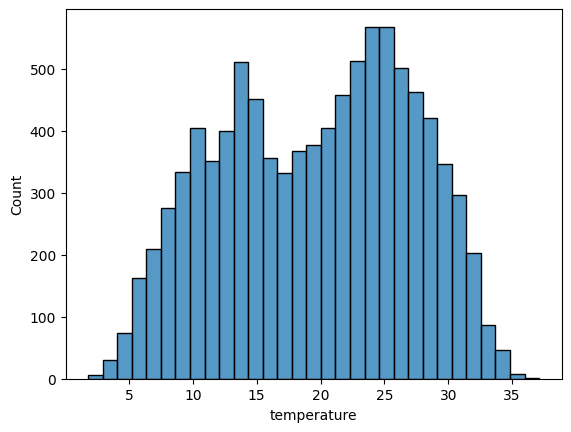

In [ ]:
sns.histplot(df_cleaned['temperature'])
plt.show()

In [ ]:
df_cleaned['temperature'].skew()

-0.1361069178515444

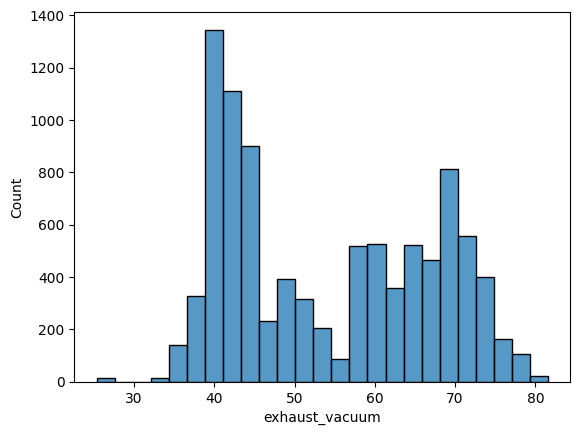

In [ ]:
sns.histplot(df_cleaned['exhaust_vacuum'])
plt.show()

In [ ]:
df_cleaned['exhaust_vacuum'].skew()

0.1968187812768364

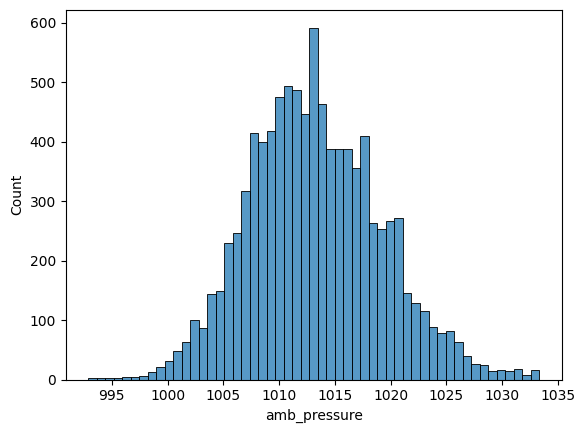

In [ ]:
sns.histplot(df_cleaned['amb_pressure'])
plt.show()

In [ ]:
df_cleaned['amb_pressure'].skew()

0.273845628693525

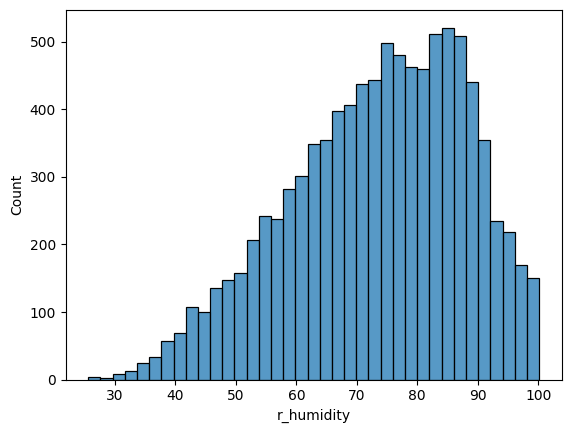

In [ ]:
sns.histplot(df_cleaned['r_humidity'])
plt.show()

In [ ]:
df_cleaned['r_humidity'].skew()

-0.43513848893895307

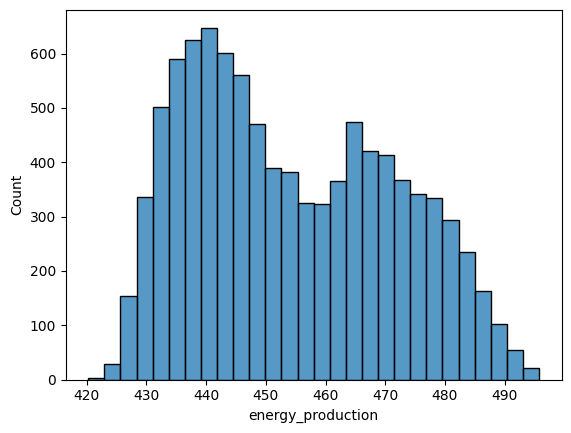

In [ ]:
sns.histplot(df_cleaned['energy_production'])
plt.show()

In [ ]:
df_cleaned['energy_production'].skew()

0.3057905126118896

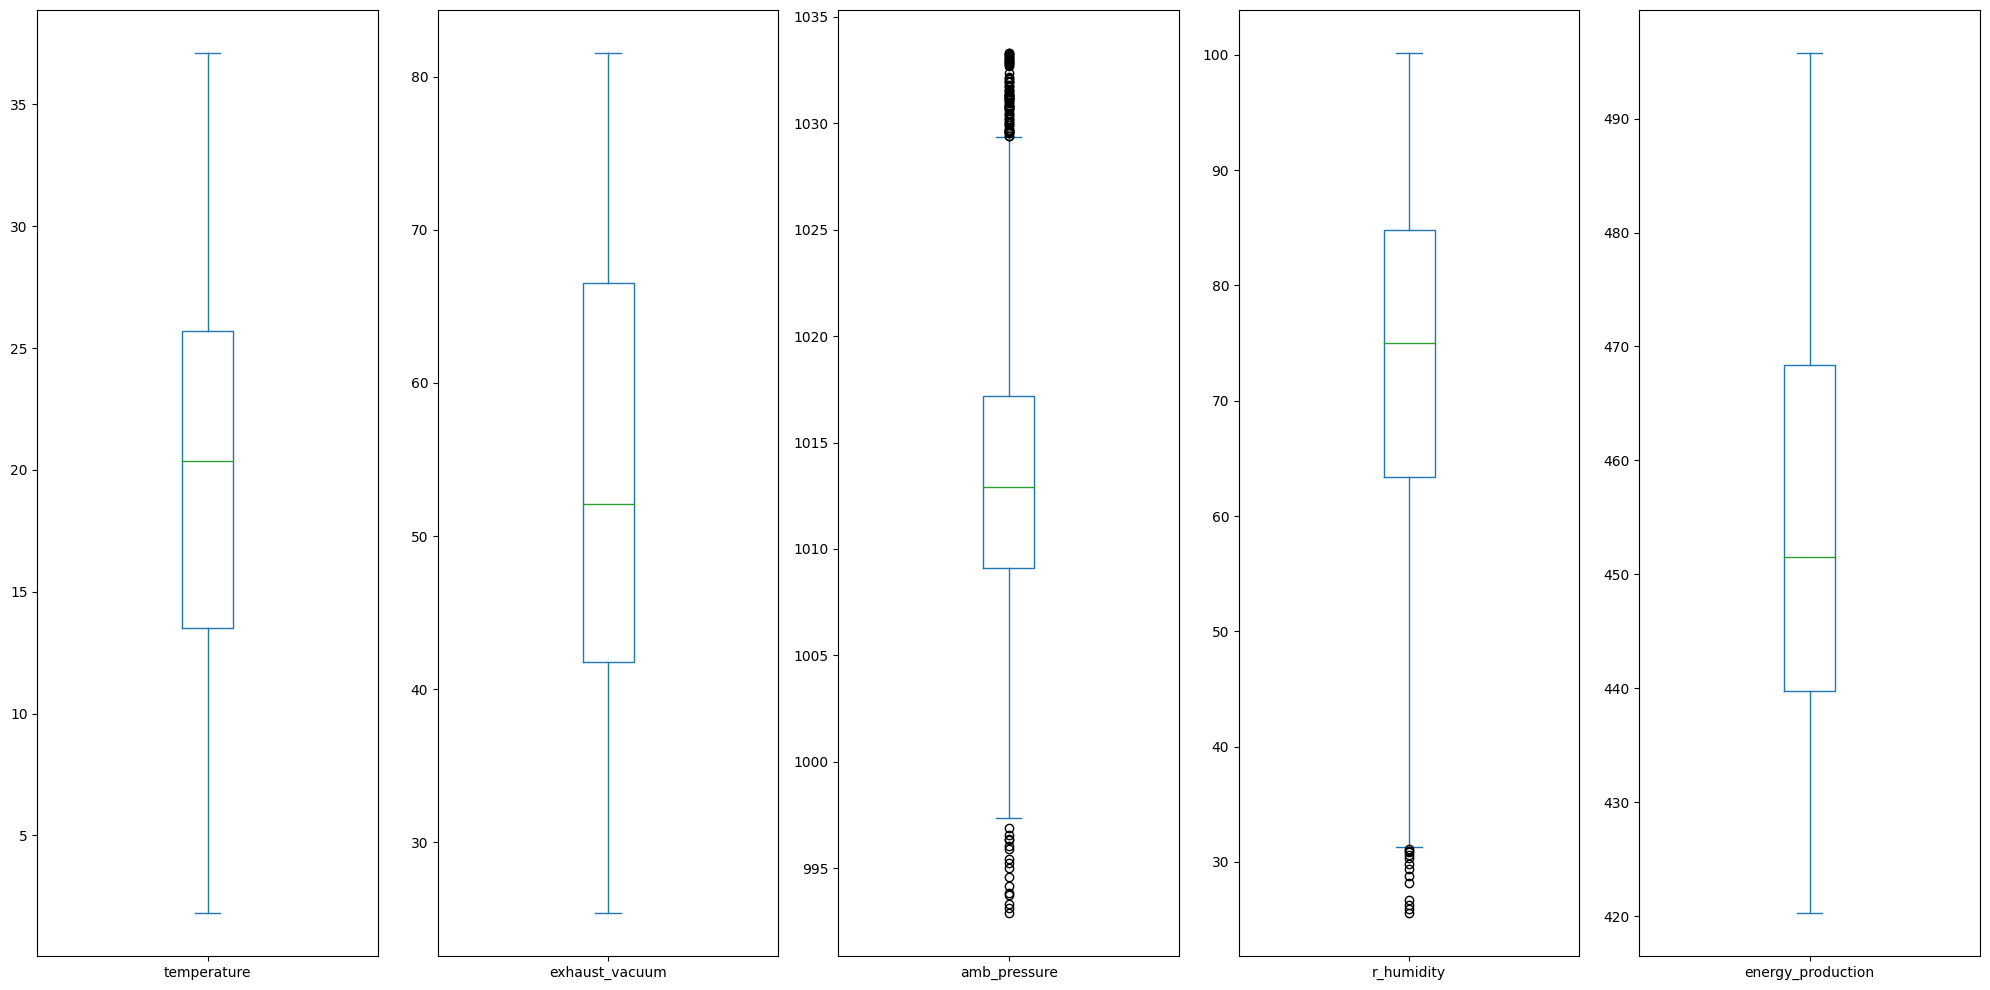

In [ ]:
#outliners
df_cleaned.plot(kind='box', subplots=True, figsize=(20,10))
plt.tight_layout()

In [ ]:
df_cleaned.drop(df_cleaned.index[df_cleaned['amb_pressure']>1029],inplace=True)
df_cleaned.drop(df_cleaned.index[df_cleaned['amb_pressure']<997],inplace=True)
df_cleaned.drop(df_cleaned.index[df_cleaned['r_humidity']<31],inplace=True)

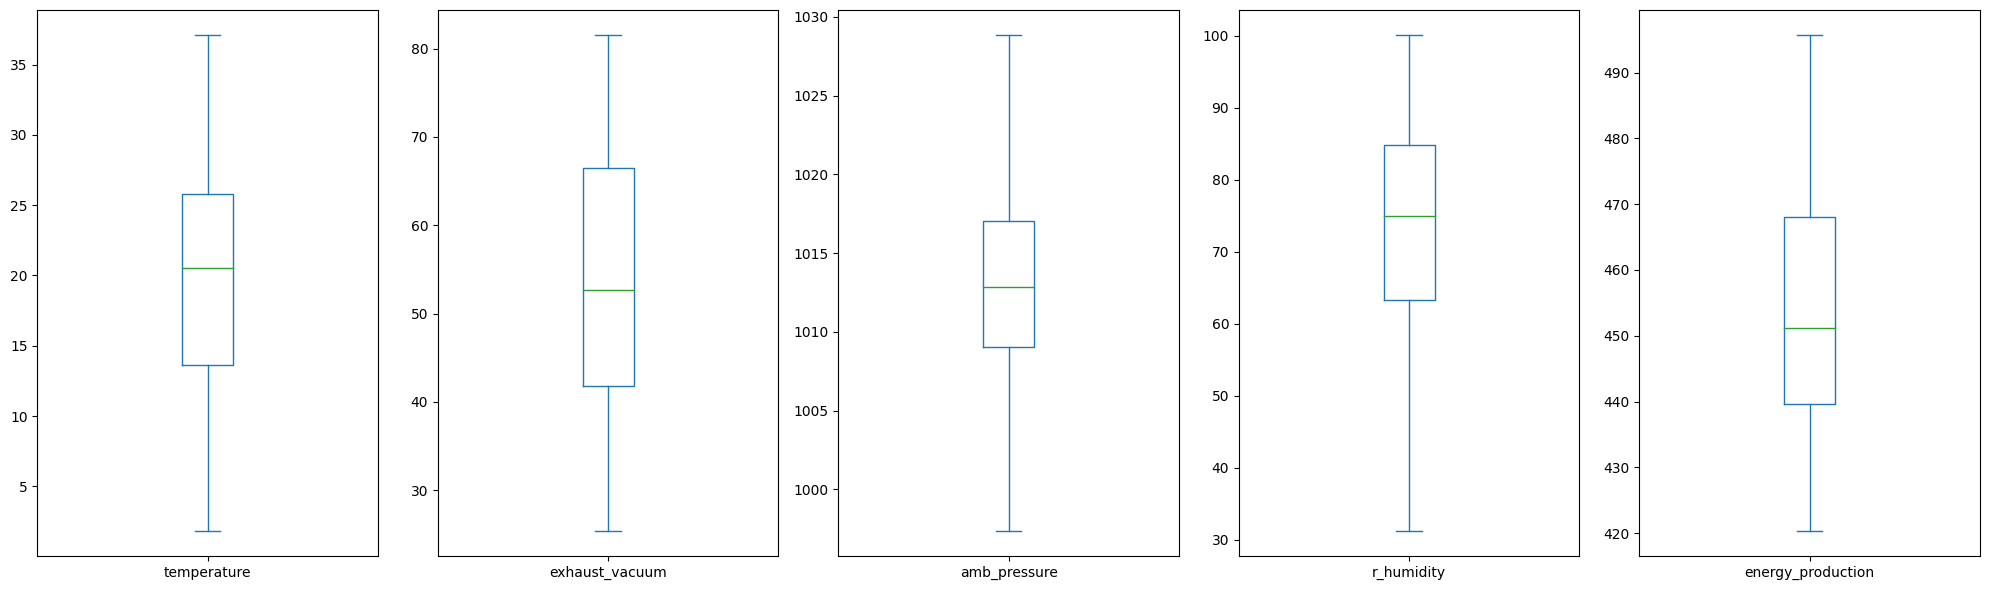

In [ ]:
df_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

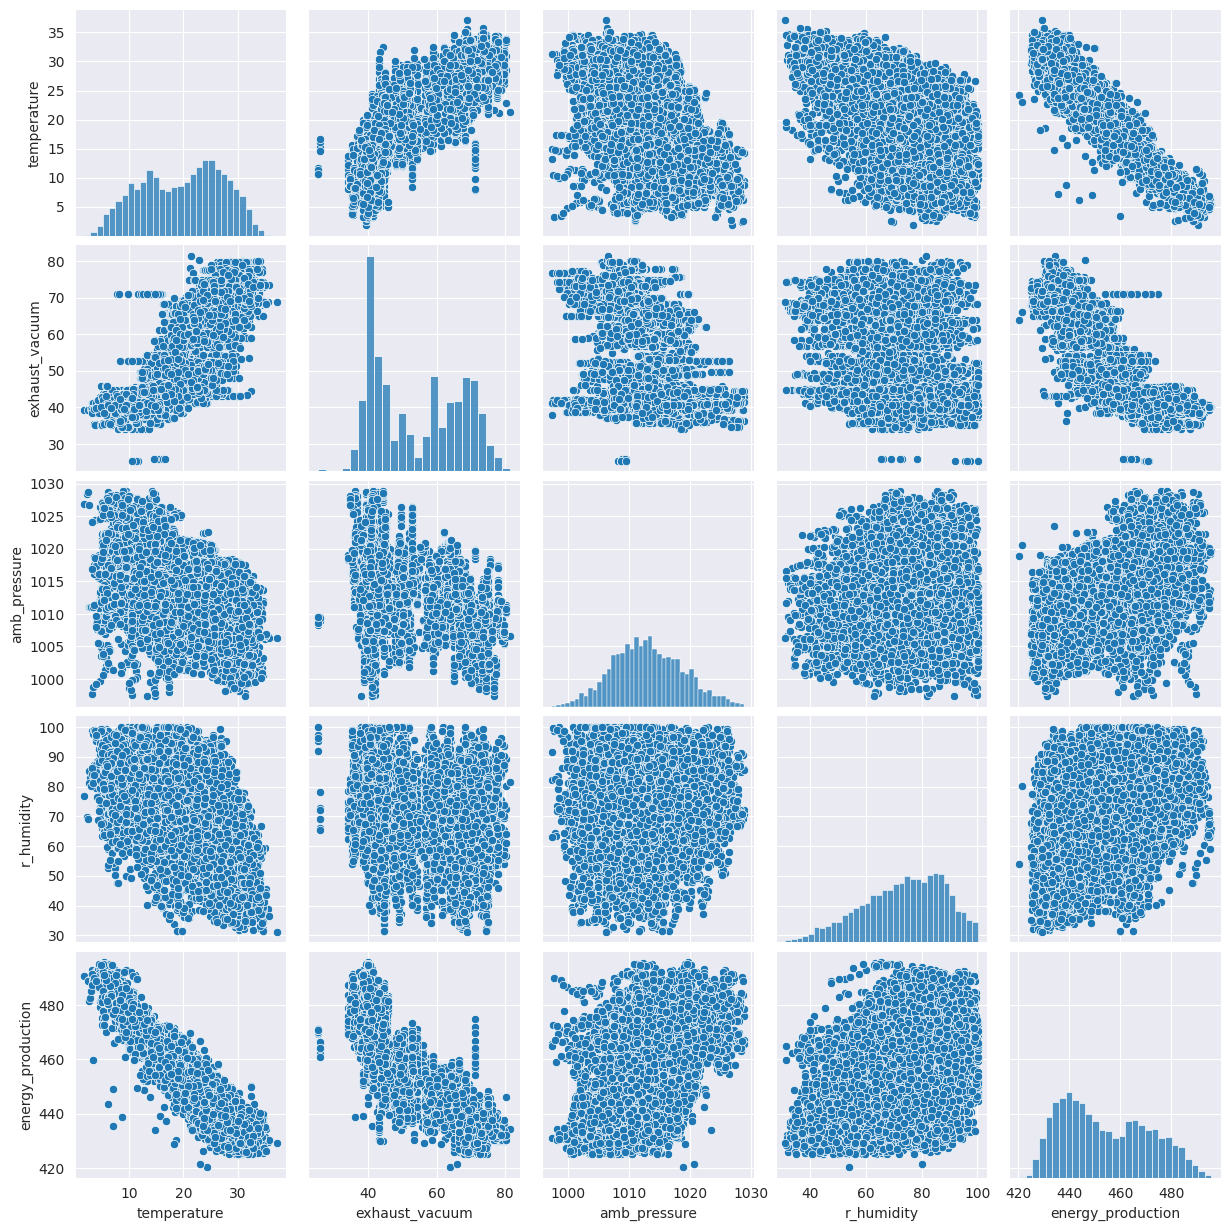

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df_cleaned)

In [ ]:
# correlation
corr_matrix=df_cleaned.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842231,-0.509005,-0.543672,-0.947242
exhaust_vacuum,0.842231,1.000000,-0.417355,-0.310233,-0.868760
amb_pressure,-0.509005,-0.417355,1.000000,0.107419,0.521276
r_humidity,-0.543672,-0.310233,0.107419,1.000000,0.389424
energy_production,-0.947242,-0.868760,0.521276,0.389424,1.000000


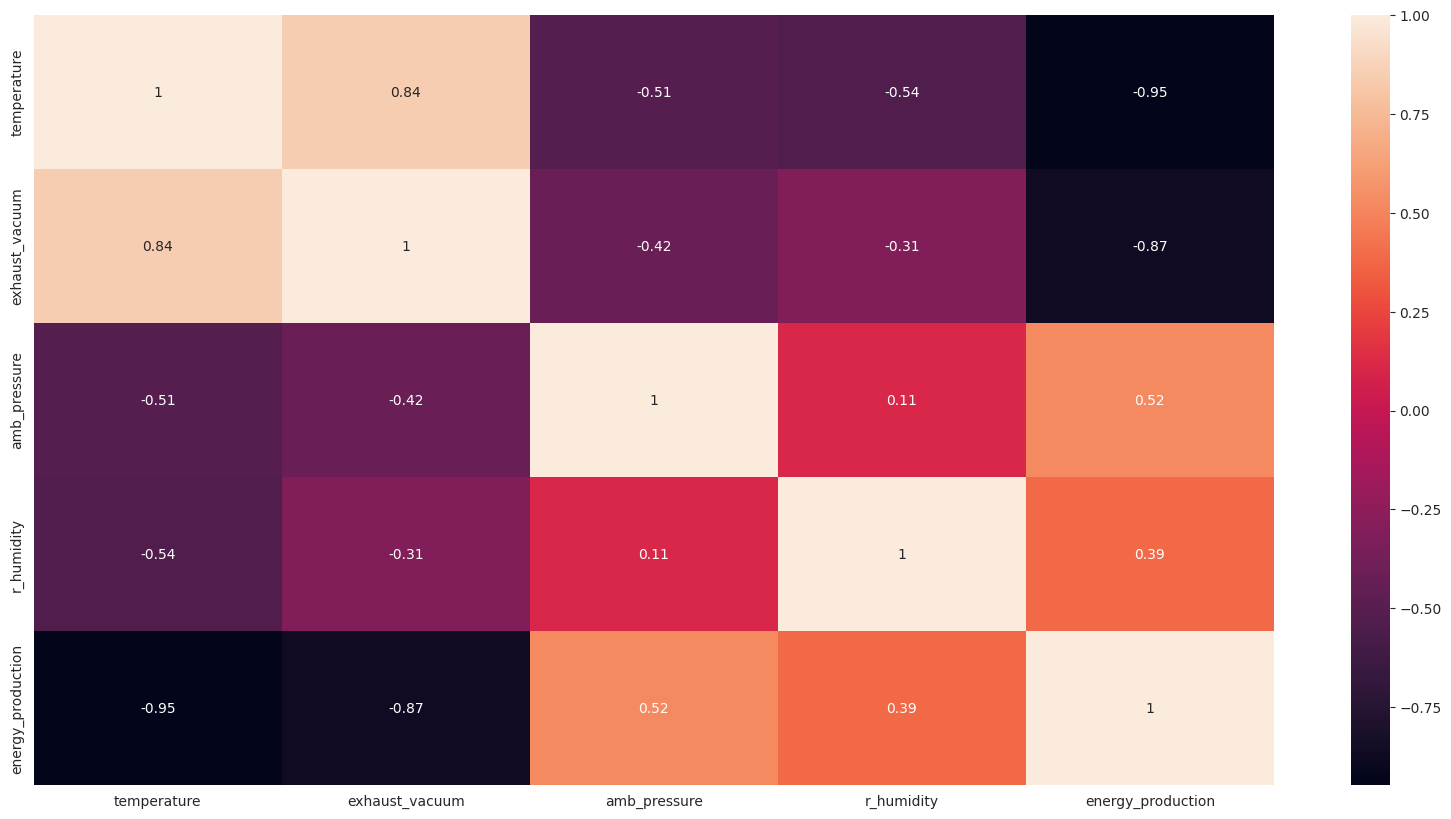

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

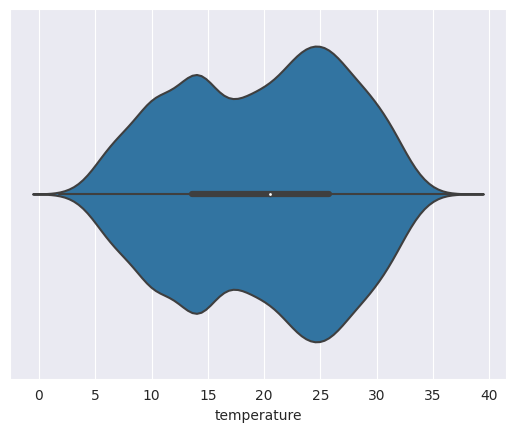

In [ ]:
#observe the distribution of numeric data
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['temperature'])
plt.show()

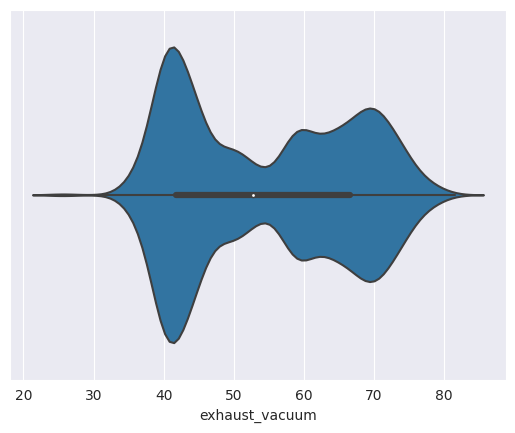

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['exhaust_vacuum'])
plt.show()

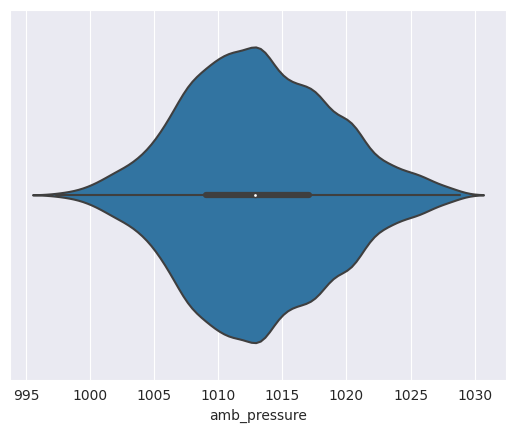

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['amb_pressure'])
plt.show()

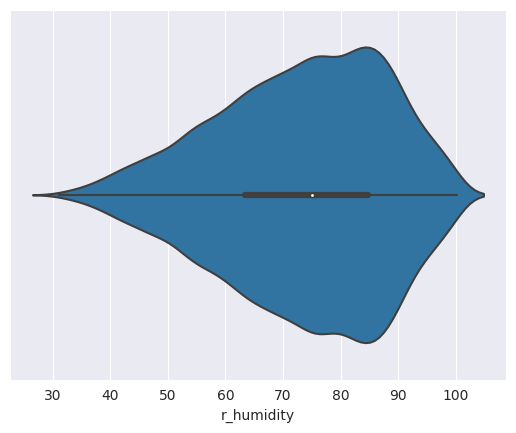

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['r_humidity'])
plt.show()

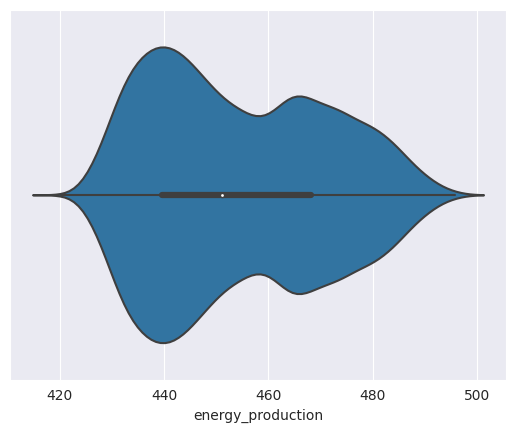

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['energy_production'])
plt.show()

<ipython-input-44-309fc62010ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['temperature'])


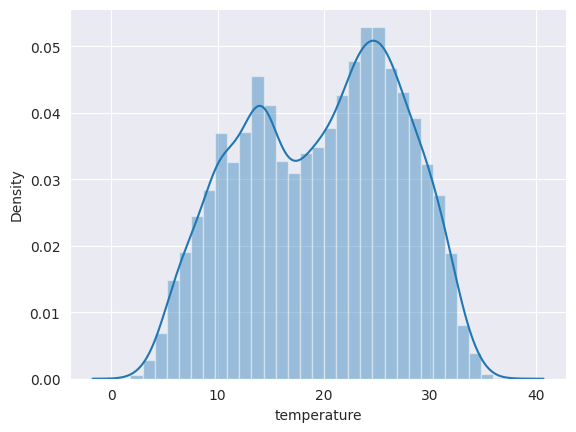

In [ ]:
# normal distribution
sns.distplot(df_cleaned['temperature'])
plt.show()

<ipython-input-45-a56295c184ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['exhaust_vacuum'])


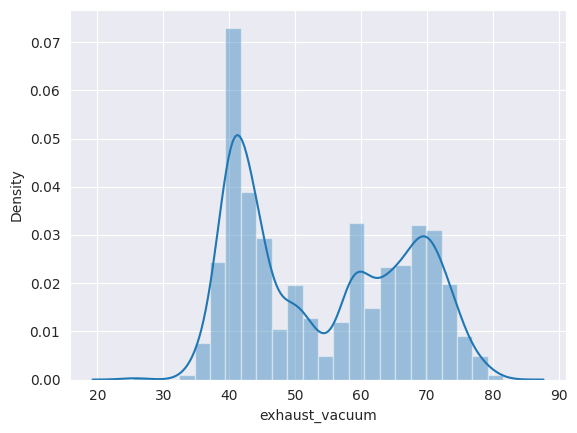

In [ ]:
sns.distplot(df_cleaned['exhaust_vacuum'])
plt.show()

<ipython-input-47-558db2e6a94c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['amb_pressure'])


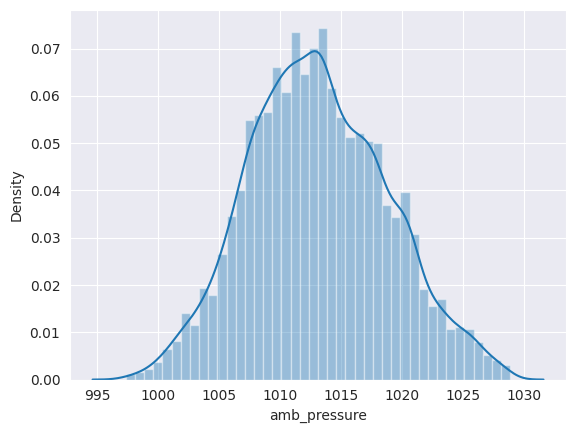

In [ ]:
sns.distplot(df_cleaned['amb_pressure'])
plt.show()

<ipython-input-48-0211106044fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['r_humidity'])


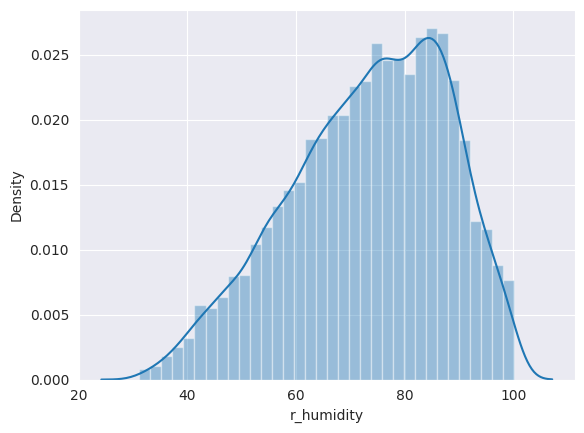

In [ ]:
sns.distplot(df_cleaned['r_humidity'])
plt.show()

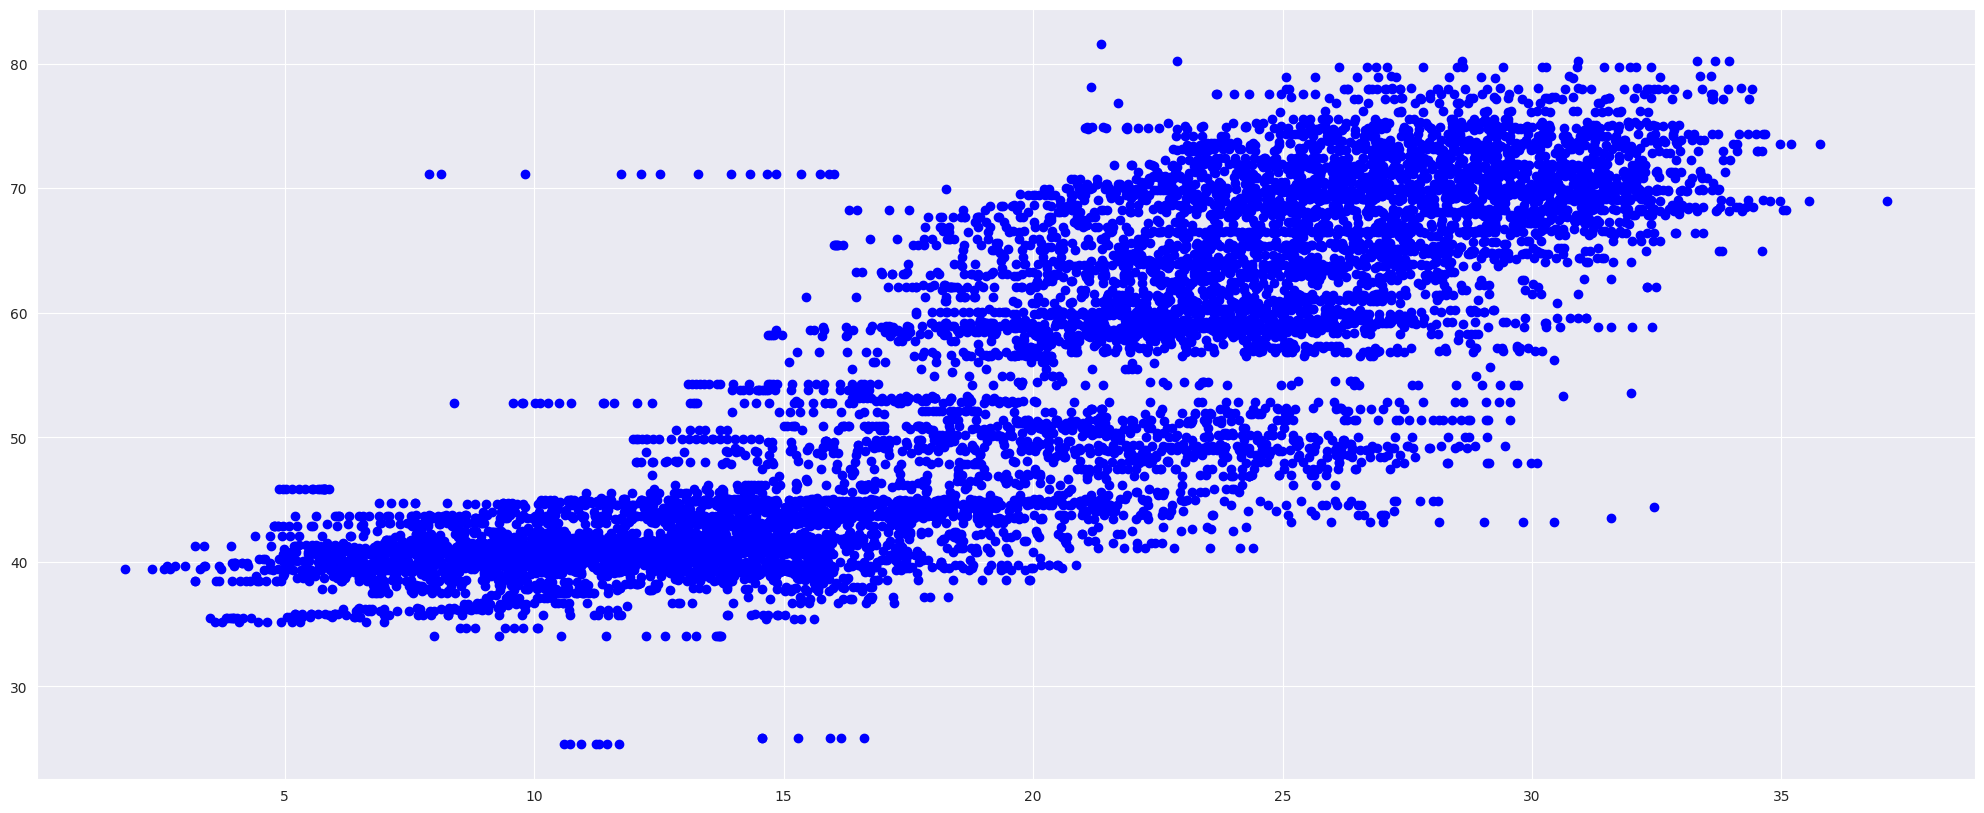

In [ ]:
#positive correlation on independent features
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.scatter(df_cleaned['temperature'],df_cleaned['exhaust_vacuum'],color='blue')
plt.show()

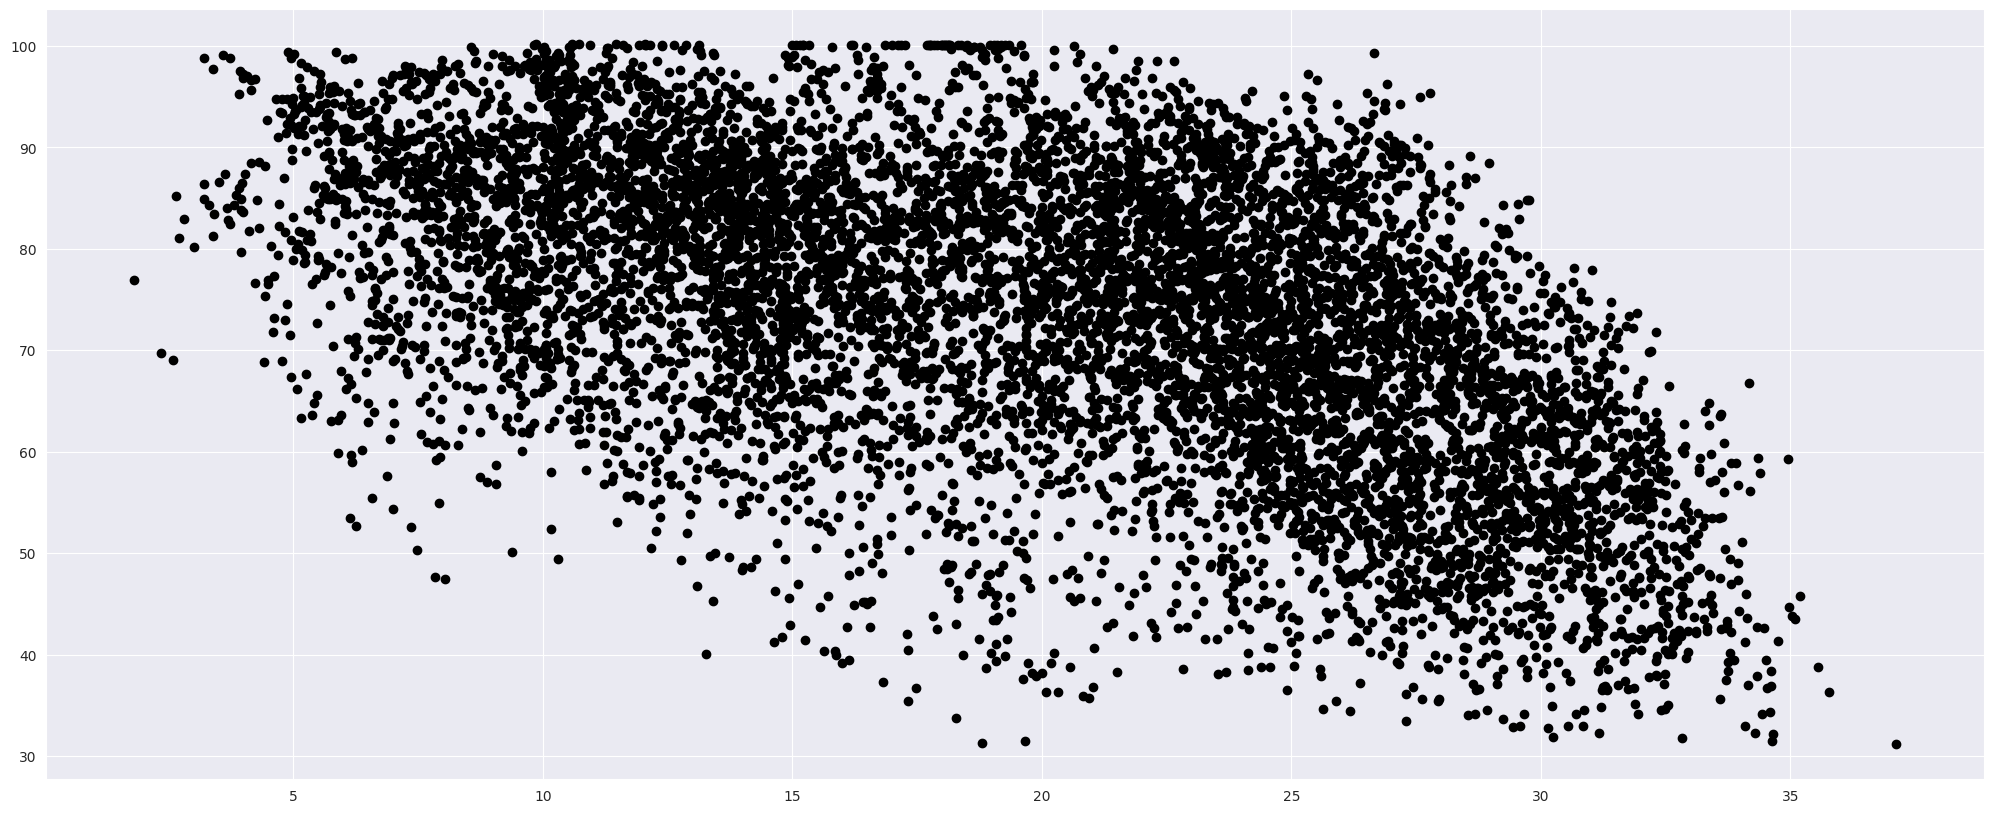

In [ ]:
# negative  correlation on independent features
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.scatter(df_cleaned["temperature"],df_cleaned["r_humidity"],color = "black")
plt.show()

In [ ]:
!pip install klib

In [ ]:
import klib

<Axes: xlabel='temperature', ylabel='Density'>

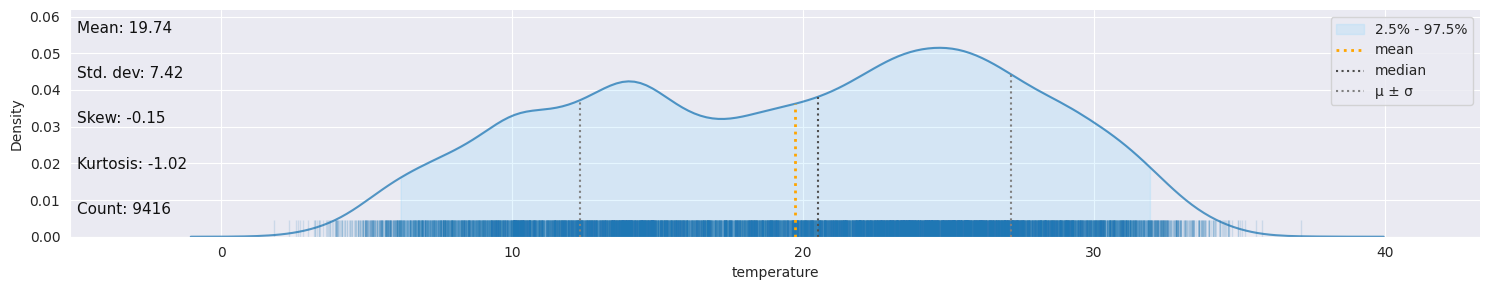

In [ ]:
klib.dist_plot(df_cleaned)

In [ ]:
#correlation matrix
klib.corr_mat(df_cleaned)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.00,0.84,-0.51,-0.54,-0.95
exhaust_vacuum,0.84,1.00,-0.42,-0.31,-0.87
amb_pressure,-0.51,-0.42,1.00,0.11,0.52
r_humidity,-0.54,-0.31,0.11,1.00,0.39
energy_production,-0.95,-0.87,0.52,0.39,1.00


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

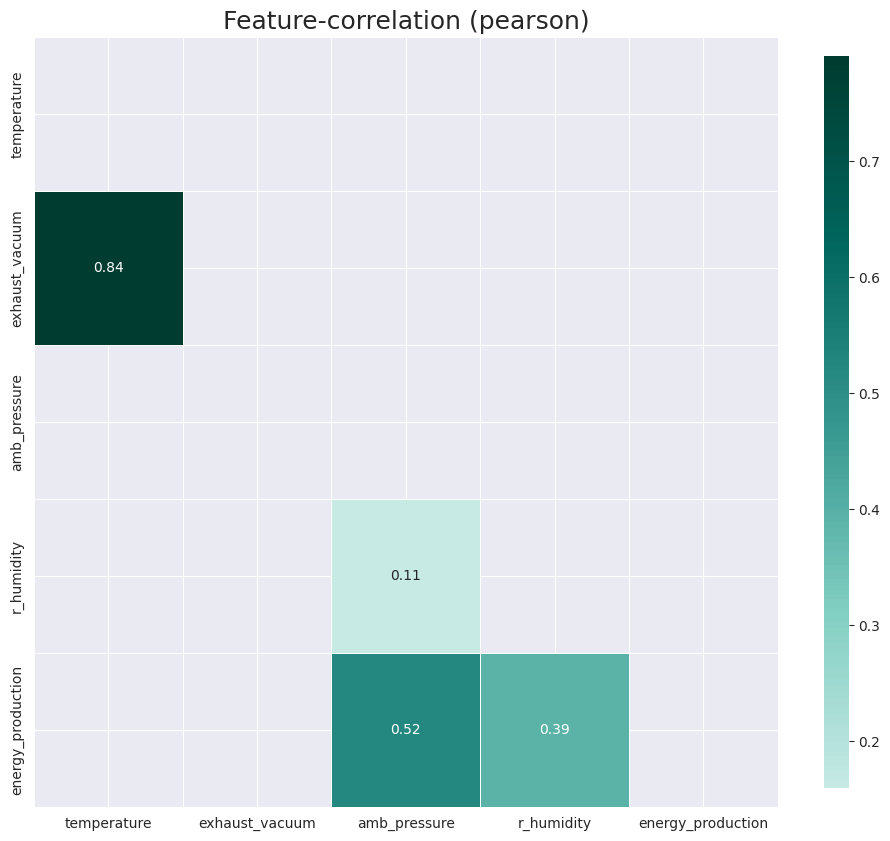

In [ ]:
# positive Correlation
klib.corr_plot(df_cleaned,split="pos")

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

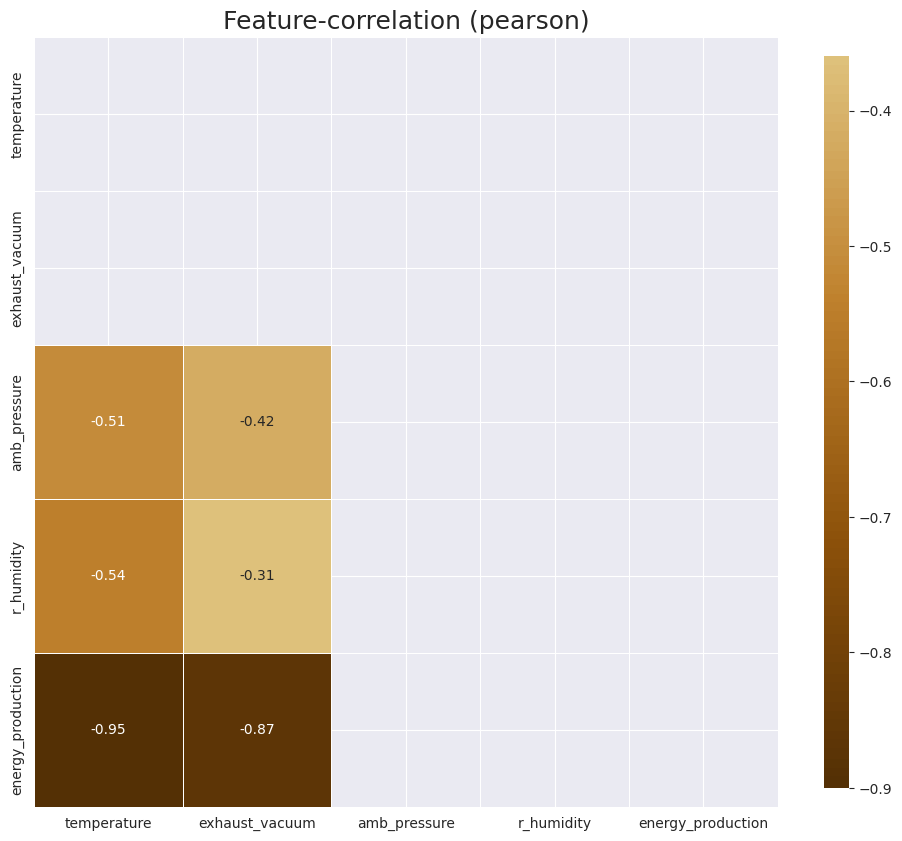

In [ ]:
# negative Correlation
klib.corr_plot(df_cleaned,split="neg")

<Axes: title={'center': 'Feature-correlation (pearson)'}>

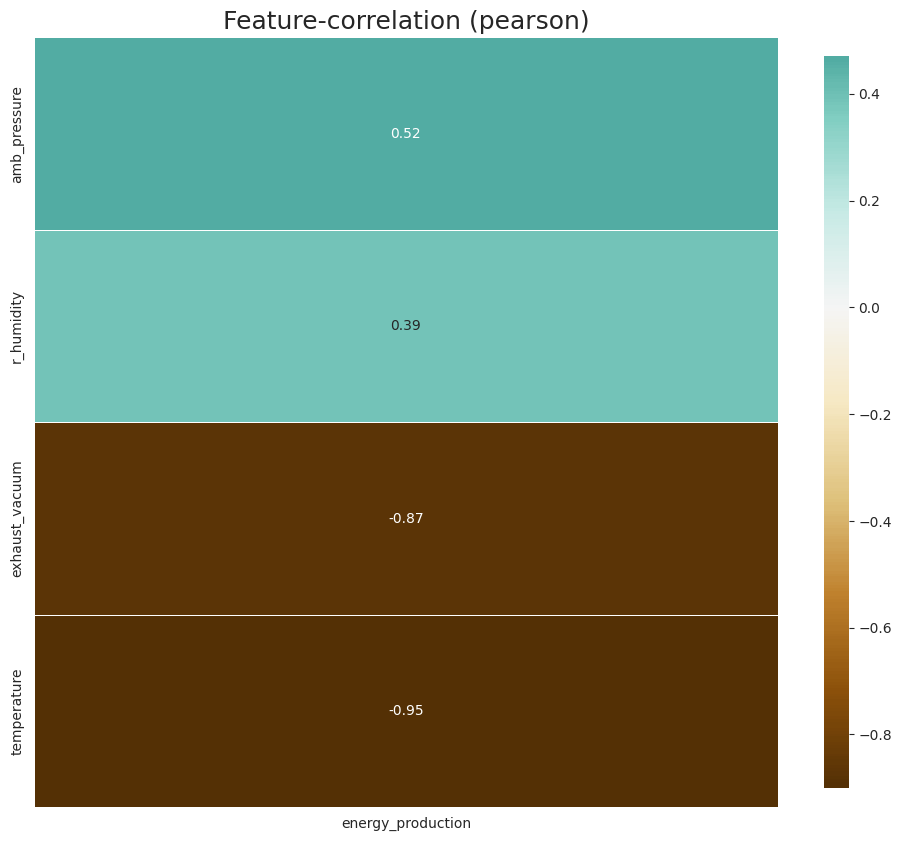

In [ ]:
# correlation with a target variable
klib.corr_plot(df_cleaned,target='energy_production')

In [ ]:
#normalizing the data:
from sklearn import preprocessing
df_norm=preprocessing.normalize(df_cleaned)
print(df_norm)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]


In [ ]:
df_norm=pd.DataFrame(df_norm)
print(df_norm)

             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9411  0.015421  0.044810  0.906771  0.073784  0.412404
9412  0.022222  0.058713  0.912432  0.047445  0.401592
9413  0.027765  0.051297  0.916848  0.051297  0.391607
9414  0.020732  0.059538  0.919990  0.072374  0.380008
9415  0.015842  0.043955  0.911105  0.056825  0.405555

[9416 rows x 5 columns]


,0,1,2,3,4
0,1.000000,0.851161,0.941456,-0.509108,-0.932302
1,0.851161,1.000000,0.827240,-0.283571,-0.879679
2,0.941456,0.827240,1.000000,-0.488616,-0.983694
3,-0.509108,-0.283571,-0.488616,1.000000,0.343622
4,-0.932302,-0.879679,-0.983694,0.343622,1.000000


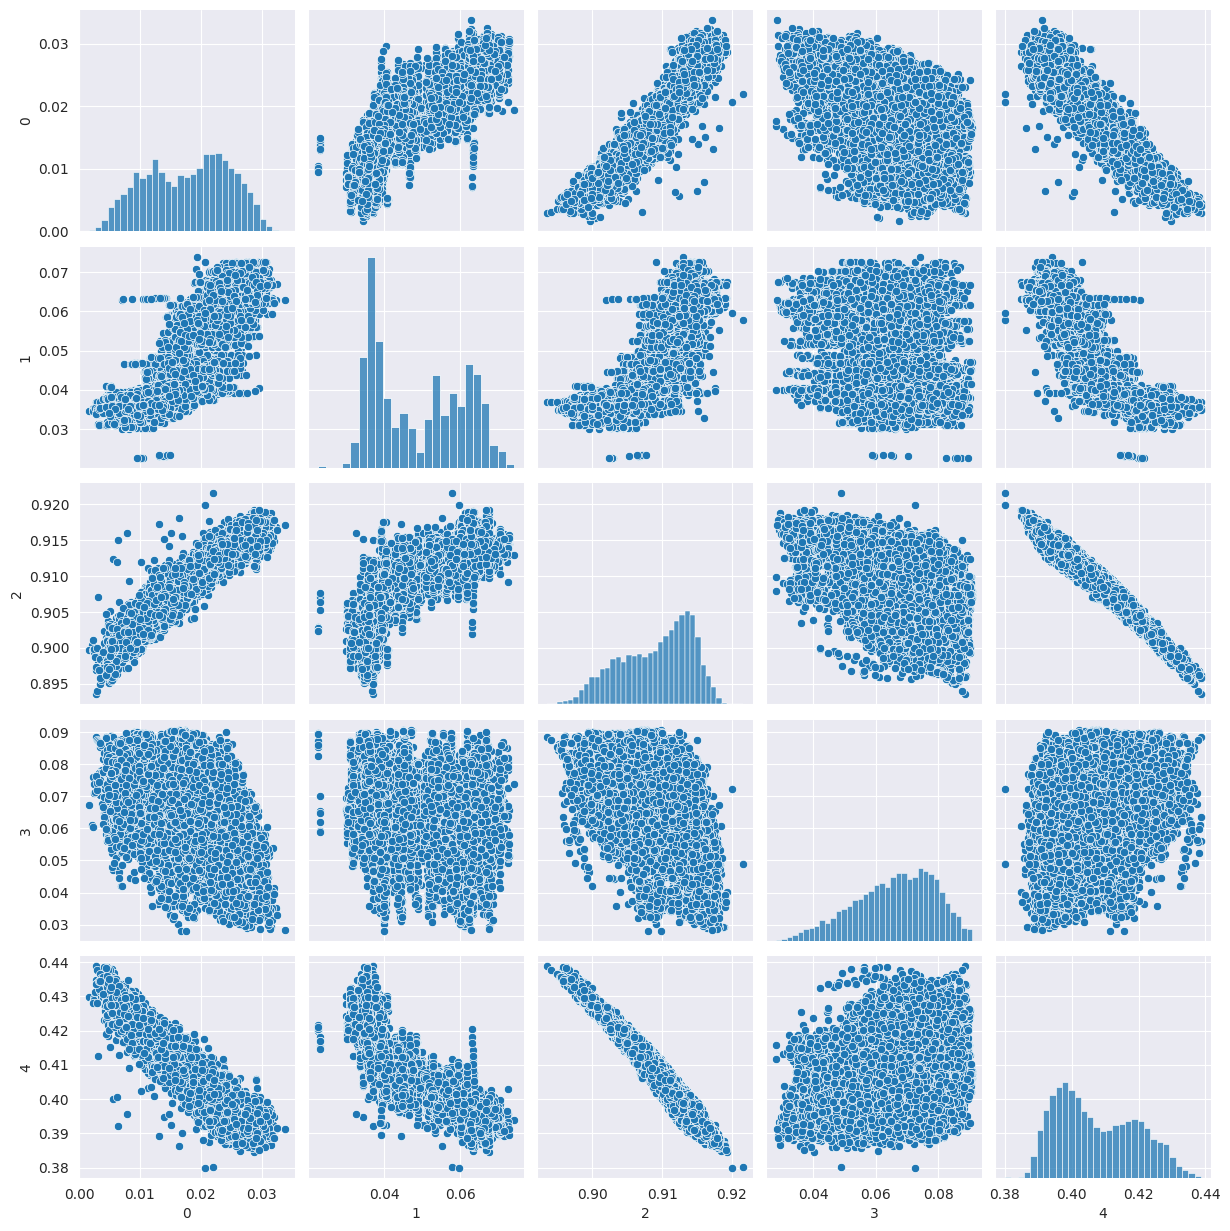

In [ ]:
sns.pairplot(df_norm)
df_norm.corr()

In [ ]:
df_norm.columns = df.columns
df_norm.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142


In [ ]:
x=df_norm.iloc[:,0:4]
y=df_norm.iloc[:,4]

In [ ]:
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,0.008506,0.034201,0.902042,0.053306
1,0.010695,0.037611,0.905823,0.084096
2,0.012283,0.039923,0.907240,0.072346
3,0.012205,0.048305,0.905506,0.070349
4,0.013427,0.044025,0.907975,0.066516
...,...,...,...,...
9411,0.015421,0.044810,0.906771,0.073784
9412,0.022222,0.058713,0.912432,0.047445
9413,0.027765,0.051297,0.916848,0.051297
9414,0.020732,0.059538,0.919990,0.072374


In [ ]:
y

0       0.426891
1       0.413382
2       0.412235
3       0.415484
4       0.411142
          ...   
9411    0.412404
9412    0.401592
9413    0.391607
9414    0.380008
9415    0.405555
Name: energy_production, Length: 9416, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(7532, 4)
(1884, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(7532,)
(1884,)


**MODEL BUILDING**

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
model = smf.ols(formula='energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=df).fit()
model

In [ ]:
model.params

Intercept         454.609274
temperature        -1.977513
exhaust_vacuum     -0.233916
amb_pressure        0.062083
r_humidity         -0.158054
dtype: float64

In [ ]:
np.round(model.pvalues,4),np.round(model.tvalues,4)

(Intercept         0.0
 temperature       0.0
 exhaust_vacuum    0.0
 amb_pressure      0.0
 r_humidity        0.0
 dtype: float64,
 Intercept          46.6337
 temperature      -129.3420
 exhaust_vacuum    -32.1221
 amb_pressure        6.5641
 r_humidity        -37.9185
 dtype: float64)

In [ ]:
#Finding R-Squared values
print('Rsquared value:',model.rsquared) , print('Rsquared adj value:',model.rsquared_adj)
#model accuracy is 92%

Rsquared value: 0.9286960898122537
Rsquared adj value: 0.9286662648994909


(None, None)

In [ ]:
slr_exh=smf.ols(formula='energy_production~exhaust_vacuum', data=df).fit()
slr_exh.tvalues , slr_exh.pvalues


(Intercept         1370.218159
 exhaust_vacuum    -172.401540
 dtype: float64,
 Intercept         0.0
 exhaust_vacuum    0.0
 dtype: float64)

In [ ]:
slr_amb=smf.ols(formula='energy_production~amb_pressure', data=df).fit()
slr_amb.tvalues , slr_amb.pvalues

(Intercept      -41.448628
 amb_pressure    59.296232
 dtype: float64,
 Intercept       0.0
 amb_pressure    0.0
 dtype: float64)

In [ ]:
slr_r_hum=smf.ols(formula='energy_production~r_humidity', data=df).fit()
slr_r_hum.tvalues , slr_r_hum.pvalues


(Intercept     511.676167
 r_humidity     41.398730
 dtype: float64,
 Intercept     0.0
 r_humidity    0.0
 dtype: float64)

In [ ]:
slr_tmp=smf.ols(formula='energy_production~temperature', data=df).fit()
slr_tmp.tvalues , slr_tmp.pvalues

(Intercept      3177.280433
 temperature    -291.715195
 dtype: float64,
 Intercept      0.0
 temperature    0.0
 dtype: float64)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:48:23   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        454.6093      9.749     46.634      0.000     435.500     473.718
temperature       -1.9775      0.015   -129.342      0.000      -2.007      -1.948
exhaust_vacuum    -0.2339      0.007    -32.122      0.000      -0.248      -0.220
amb_pressure       0.0621      0.009      6.564      0.000       0.044       0.081
r_humidity        -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model1 = smf.ols(formula='energy_production~temperature+amb_pressure+r_humidity',data=df).fit()
model1

In [ ]:
print('Rsquared value:',model1.rsquared) , print('Rsquared adj value:',model1.rsquared_adj)

Rsquared value: 0.9210025307676984
Rsquared adj value: 0.9209777511349405


(None, None)

In [ ]:
model2 = smf.ols(formula='energy_production~exhaust_vacuum+amb_pressure+r_humidity',data=df).fit()
model2

In [ ]:
print('Rsquared value:',model2.rsquared) , print('Rsquared adj value:',model2.rsquared_adj)

Rsquared value: 0.8039581703127989
Rsquared adj value: 0.8038966766397477


(None, None)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
x_scale= StandardScaler().fit_transform(x)
x_scale
type(x_scale)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RepeatedKFold
x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [ ]:
# selecting best models
model_selc = [LinearRegression(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators = 10),
             GradientBoostingRegressor(),
             SVR(kernel='poly'),
             xgb.XGBRegressor(),
             Ridge(alpha=4),
             Lasso(alpha=4),
             KNeighborsRegressor(),
             AdaBoostRegressor(),
              ]


In [ ]:
kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state= None)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele,x_train,y_train, cv=kfold, scoring ='r2')

    cv_results.append(cross_results)

    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean())



 MODEL:  LinearRegression() 
MEAN R2: 0.9990204145877739

 MODEL:  DecisionTreeRegressor() 
MEAN R2: 0.9978026750027847

 MODEL:  RandomForestRegressor(n_estimators=10) 
MEAN R2: 0.9991541487914571

 MODEL:  GradientBoostingRegressor() 
MEAN R2: 0.9988284537918779

 MODEL:  SVR(kernel='poly') 
MEAN R2: -0.048888069996685705

 MODEL:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None,

**MODEL FITTING**

**1. Linear Regression**

In [ ]:
# regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

#for predict the test values
y_predict_li=reg.predict(x_test)
y_predict_li


array([0.41784335, 0.42039699, 0.40191548, ..., 0.41843884, 0.39468227,
       0.39608897])

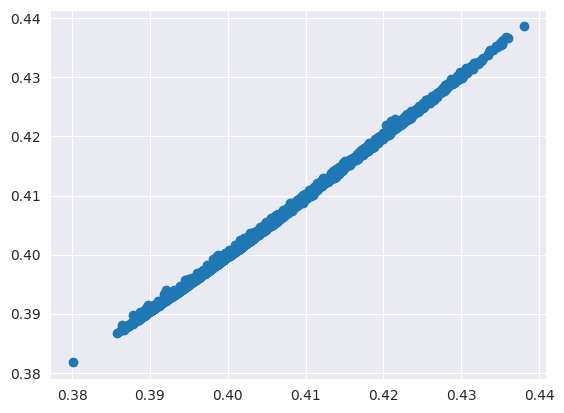

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_li)
plt.show()

(0.37741461407576415,
 0.44176332873166213,
 0.37741461407576415,
 0.44176332873166213)

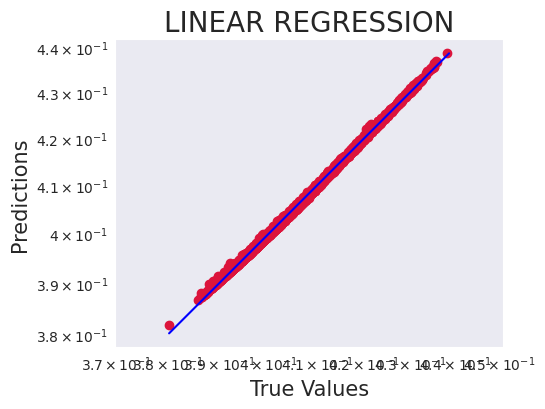

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_li, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_li), max(y_test))
p2 = min(min(y_predict_li), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LINEAR REGRESSION',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing Accuracy
test_data_model_score=reg.score(x_test,y_test)
print ('Accuracy of test data: ',test_data_model_score)
#score of test data  0.9266343475459896

#training Accuracy
train_data_model_score=reg.score(x_train,y_train)
print ('Accuracy of train data: ',train_data_model_score)
#score of train data 0.9292095855394127

Accuracy of test data:  0.9989994792157587
Accuracy of train data:  0.9990236548423539


**2. Decision Tree Regressor**

In [ ]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#for predict the test values
y_predict_dt=DTR.predict(x_test)
y_predict_dt


array([0.417891  , 0.4206116 , 0.40309506, ..., 0.41866059, 0.39378314,
       0.3961249 ])

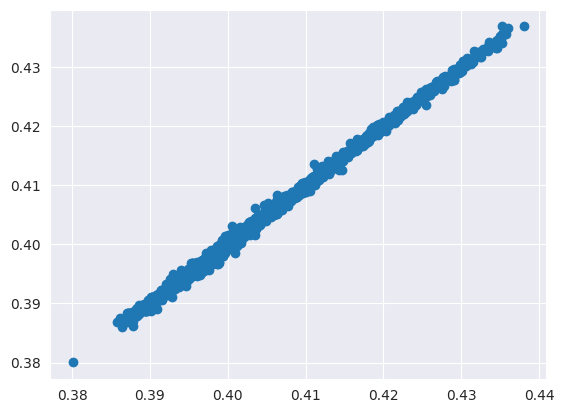

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_dt)
plt.show()

(0.3773165369530073,
 0.4411847607177551,
 0.3773165369530073,
 0.4411847607177551)

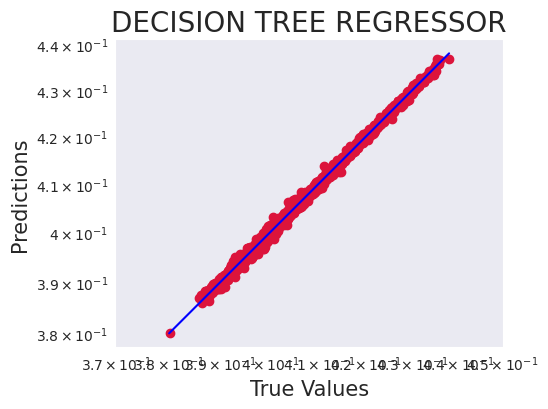

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_dt, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_dt), max(y_test))
p2 = min(min(y_predict_dt), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('DECISION TREE REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuracy
test_data_model_score=DTR.score(x_test,y_test)
print ('Accuarcy of test data',round(test_data_model_score,4))
#score of test data  0.9266432610903093

#Training Accuarcy
train_data_model_score=DTR.score(x_train,y_train)
print ('Accuracy of train data',train_data_model_score)
#score of train data 1.0

Accuarcy of test data 0.9981
Accuracy of train data 1.0


**3. Random Forest Regressor**

In [ ]:
RFR= RandomForestRegressor(n_estimators =50, random_state = 0)
RFR.fit(x_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
#for predict the test values
y_predict_rfr=RFR.predict(x_test)
y_predict_rfr


array([0.41803735, 0.42055575, 0.4028129 , ..., 0.41854942, 0.39461659,
       0.39607845])

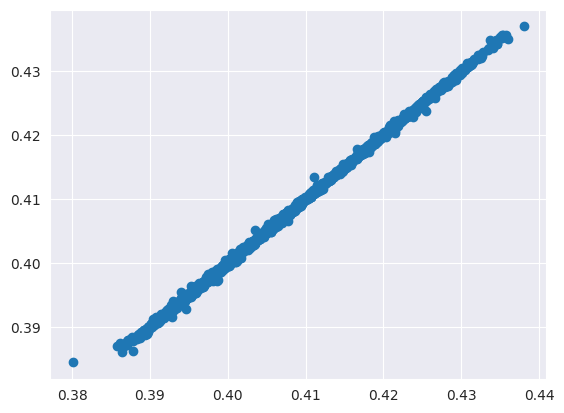

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_rfr)
plt.show()


(0.3774384444246215,
 0.44117797411853144,
 0.3774384444246215,
 0.44117797411853144)

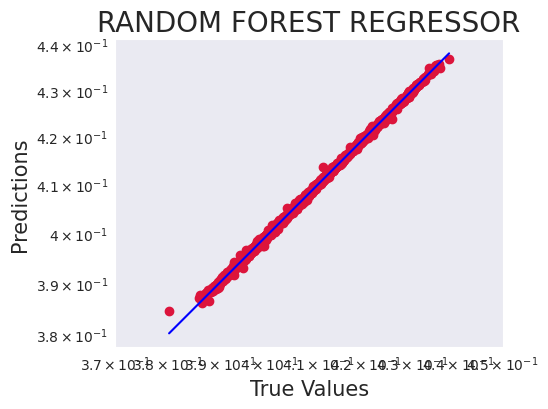

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rfr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rfr), max(y_test))
p2 = min(min(y_predict_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('RANDOM FOREST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing Accuracy
test_data_model_score=RFR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9643776538798704

#Training Accuracy
train_data_model_score=RFR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9942791162212218


Accuracy of test data 0.9994
Accuracy of train data 0.9999


**4. Gradient Boosting Regressor**

In [ ]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100) # lr = 0.1, est = 100
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
#for predict the test values
y_predict_gbr=GBR.predict(x_test)
y_predict_gbr

array([0.41774864, 0.42034599, 0.4021185 , ..., 0.41887311, 0.3947889 ,
       0.39600315])

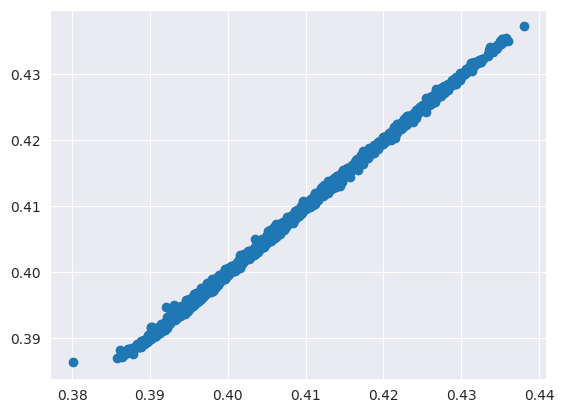

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_gbr)
plt.show()

(0.3774384444246215,
 0.44117797411853144,
 0.3774384444246215,
 0.44117797411853144)

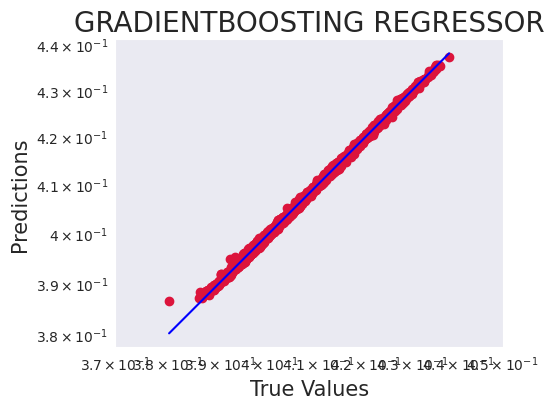

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_gbr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_gbr), max(y_test))
p2 = min(min(y_predict_gbr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('GRADIENTBOOSTING REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing Accuarcy
test_data_model_score=GBR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9526412792412793

#Training Accuracy
train_data_model_score=GBR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.952306441895972

Accuracy of test data 0.9988
Accuracy of train data 0.9992


**5. Support Vector Regressor**

In [ ]:
SVR=SVR(kernel='linear')
SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
#for predict the test values
y_predict_svr=SVR.predict(x_test)
y_predict_svr


array([0.40935756, 0.40935756, 0.40935756, ..., 0.40935756, 0.40935756,
       0.40935756])

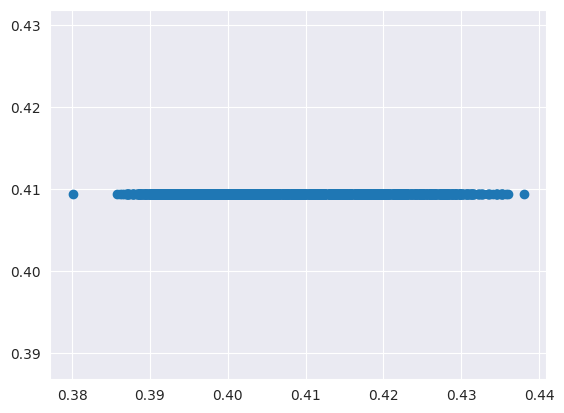

In [ ]:

#plot on prdtion
plt.scatter(y_test, y_predict_svr)
plt.show()

(0.3774384444246215,
 0.44117797411853144,
 0.3774384444246215,
 0.44117797411853144)

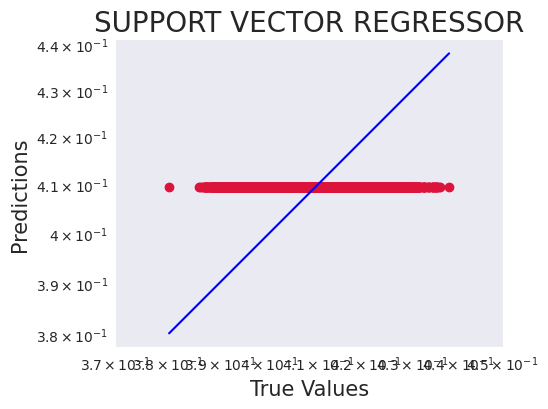

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_svr), max(y_test))
p2 = min(min(y_predict_svr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SUPPORT VECTOR REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing Accuracy
test_data_model_score=SVR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9323981412429594

#Training Accuarcy
train_data_model_score=SVR.score(x_train,y_train)
print ('accuracy of train data',round(train_data_model_score,4))
#score of test data 0.9268129221113746

Accuracy of test data -0.0232
accuracy of train data -0.0273


In [1]:
import tensorflow as tf

In [4]:
t2d=tf.constant([[1,2,3],[4,5,6],[7,8,9],[1,2,3]])
print(t2d)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]], shape=(4, 3), dtype=int32)
